In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.stats as st
import numpy as np
import datetime as dt
import seaborn as sns



# Import data
path = "appointment.csv"

noshow_df = pd.read_csv(path)
noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [2]:
# No duplicates
dup_patients = noshow_df[noshow_df.duplicated(['PatientId'])]
dup_patients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# Convert PatientId to string instead of numeric value
noshow_df['PatientId'] = noshow_df['PatientId'].astype(str)

# Drop Appointment ID
noshow_df = noshow_df.drop(columns=['AppointmentID'])

# Convert dates to datetime without times
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay']).dt.normalize()
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay']).dt.normalize()

# Calculate the difference in days, handling NaT values
diff = (noshow_df['AppointmentDay'] - noshow_df['ScheduledDay']).dt.days

# Insert 'Days Diff' column at position 4
noshow_df.insert(4, 'Days Diff', diff)

# Rename No-show column to Outcome and map values
noshow_df['Outcome'] = noshow_df['No-show']
noshow_df = noshow_df.drop(columns=['No-show'])

noshow_df['Outcome'] = noshow_df['Outcome'].map({'No':'Show', 'Yes':'No-Show'})


In [7]:
noshow_df

,PatientId,Gender,ScheduledDay,AppointmentDay,Days Diff,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Outcome
0,29872499824296.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,Show
1,558997776694438.0,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,Show
2,4262962299951.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,Show
3,867951213174.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show
4,8841186448183.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,35,56,MARIA ORTIZ,0,0,0,0,0,1,Show
110523,3596266328735.0,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,35,51,MARIA ORTIZ,0,0,0,0,0,1,Show
110524,15576631729893.0,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,41,21,MARIA ORTIZ,0,0,0,0,0,1,Show
110525,92134931435557.0,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,41,38,MARIA ORTIZ,0,0,0,0,0,1,Show


In [12]:
plot_df = noshow_df[['Days Diff', 'Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received', 'Outcome']]

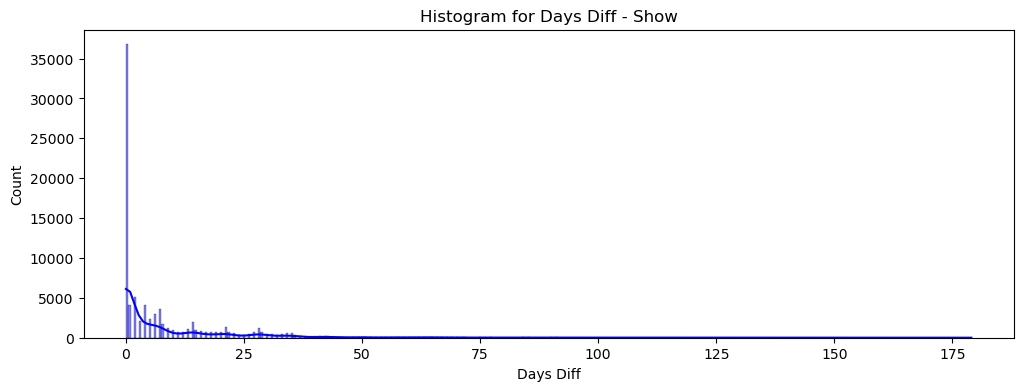

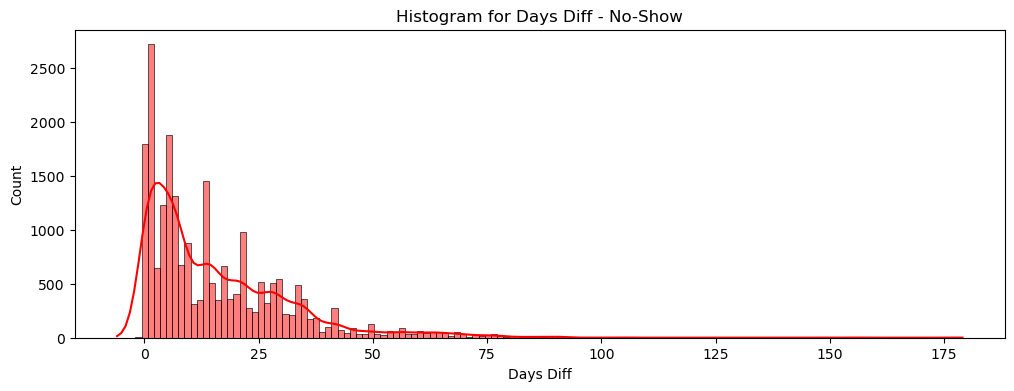

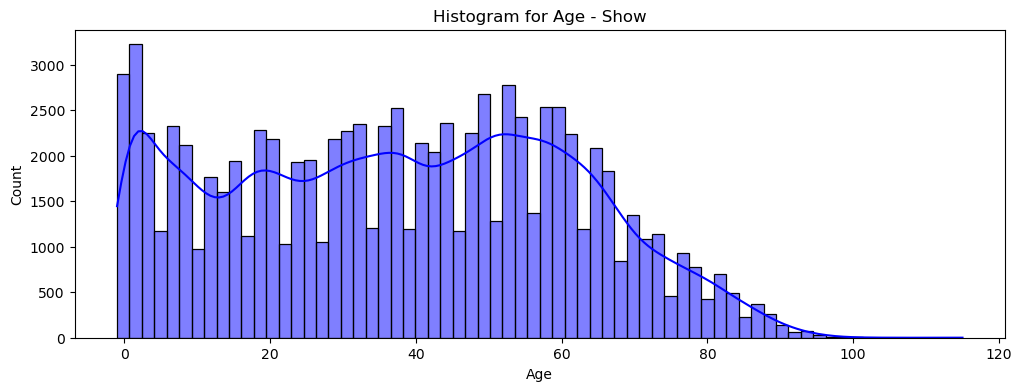

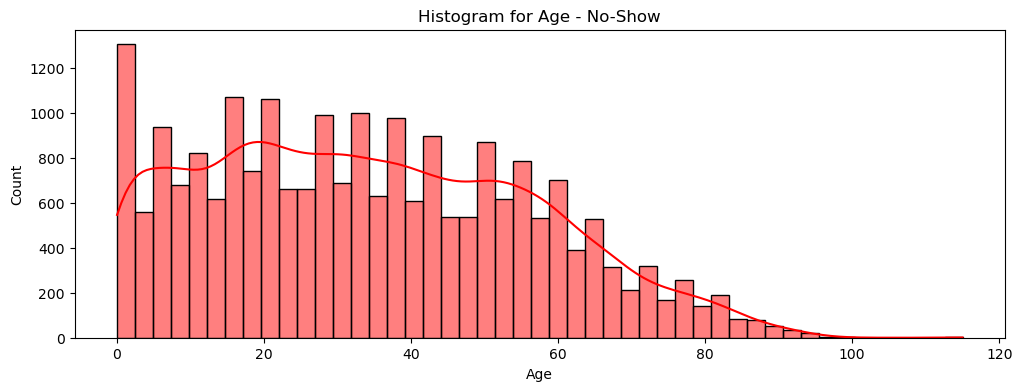

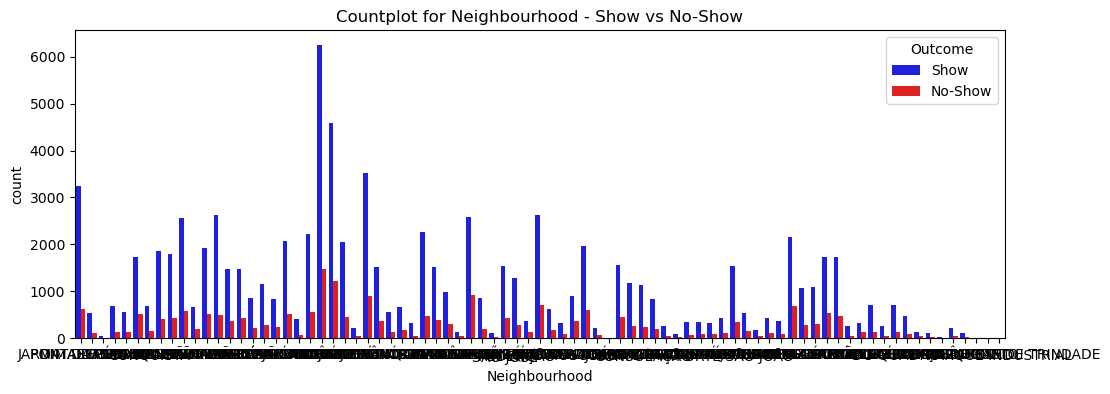

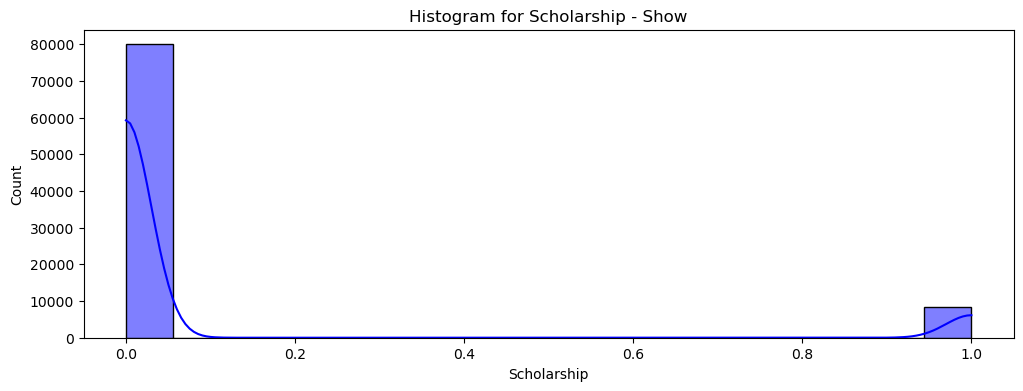

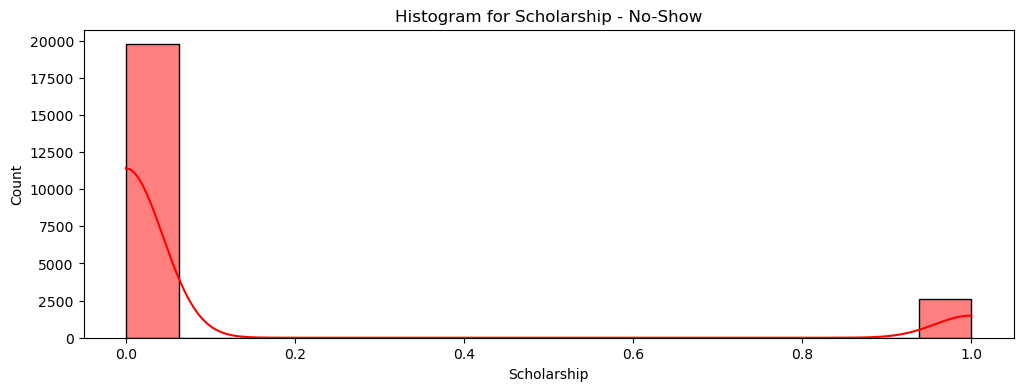

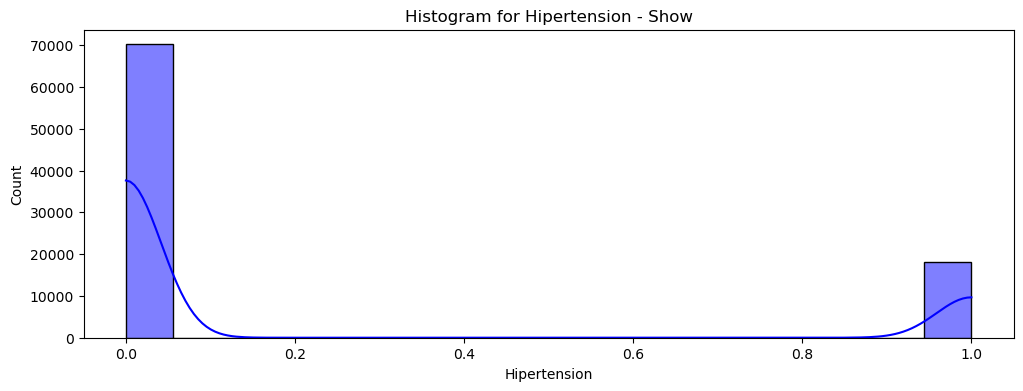

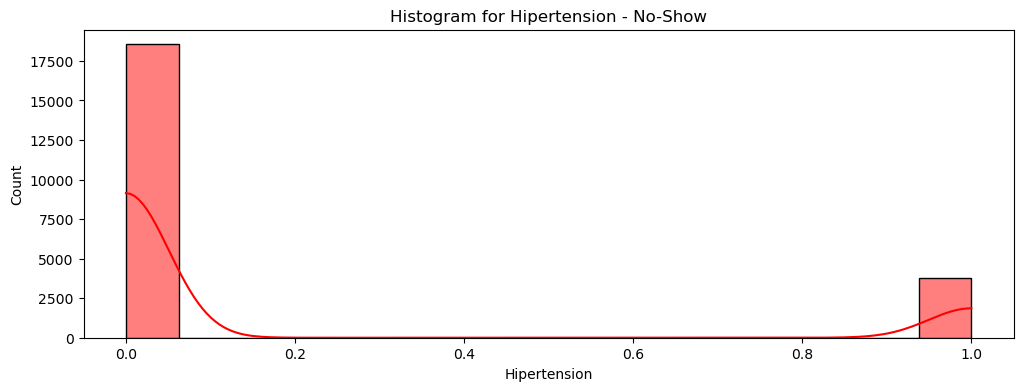

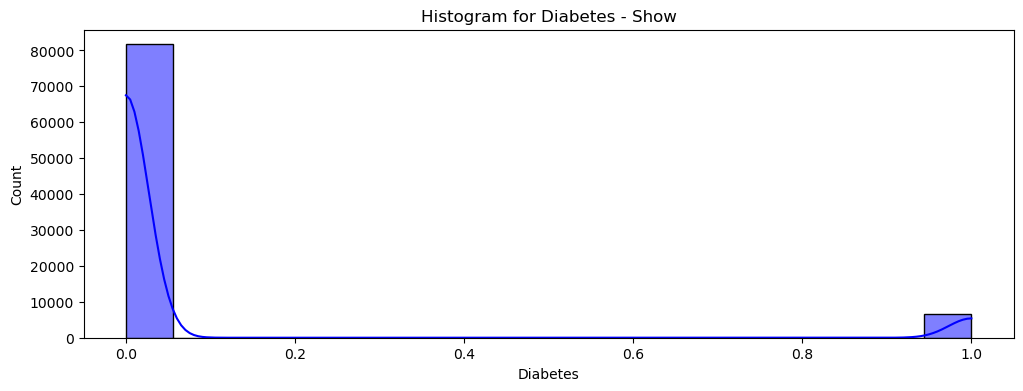

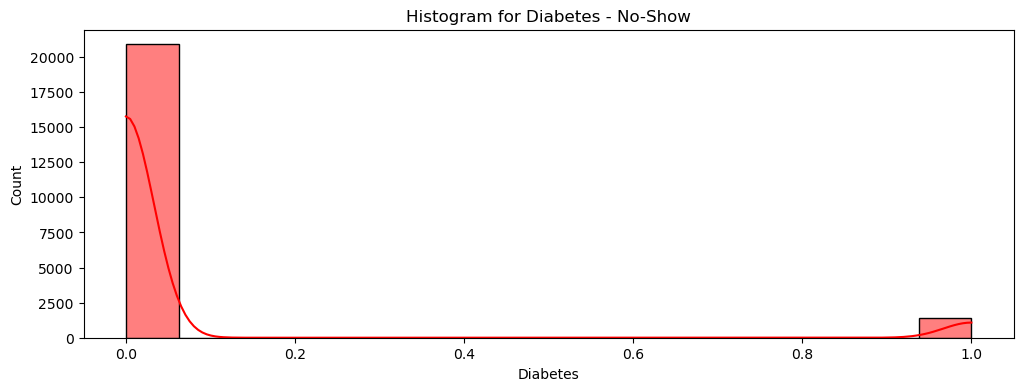

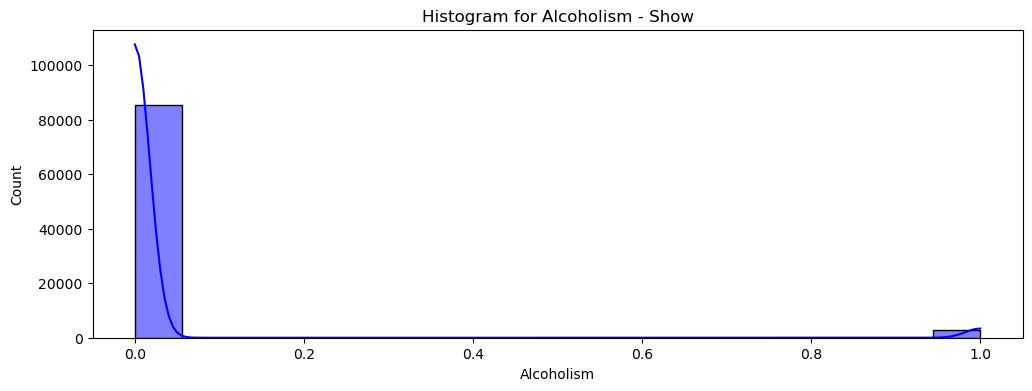

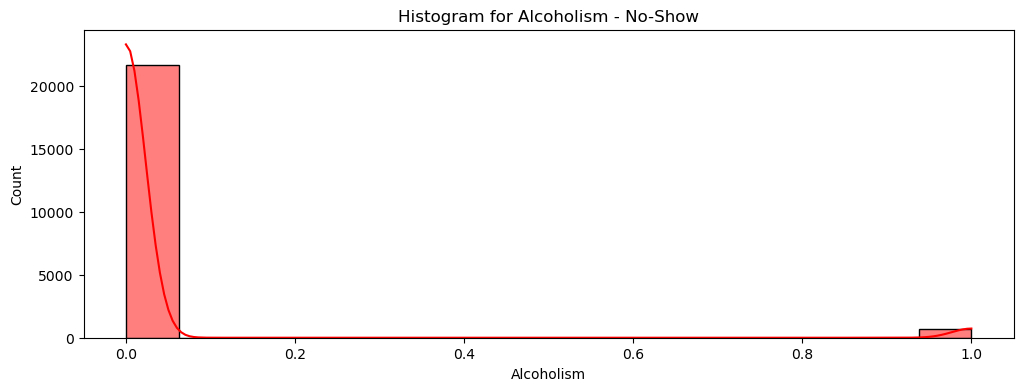

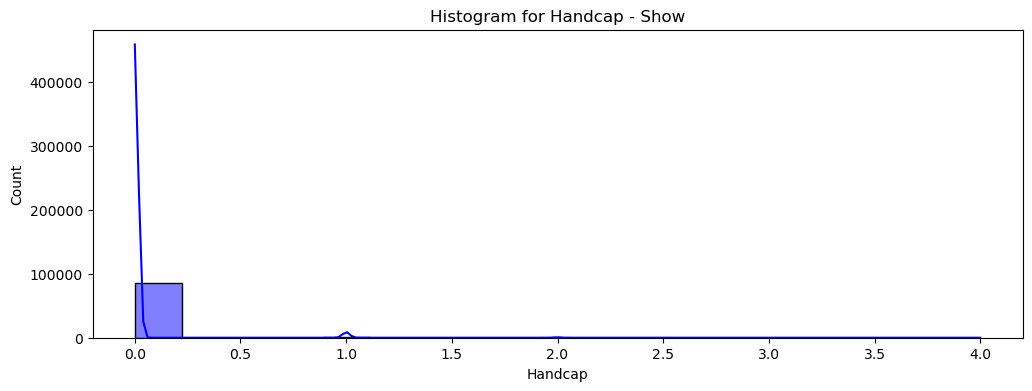

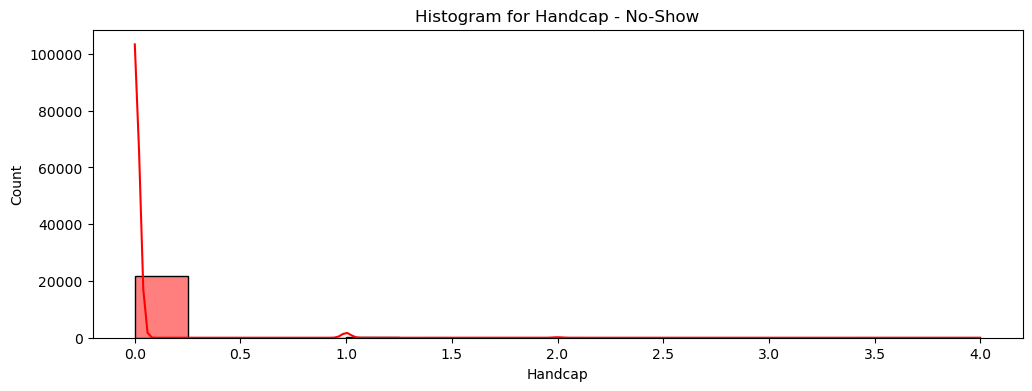

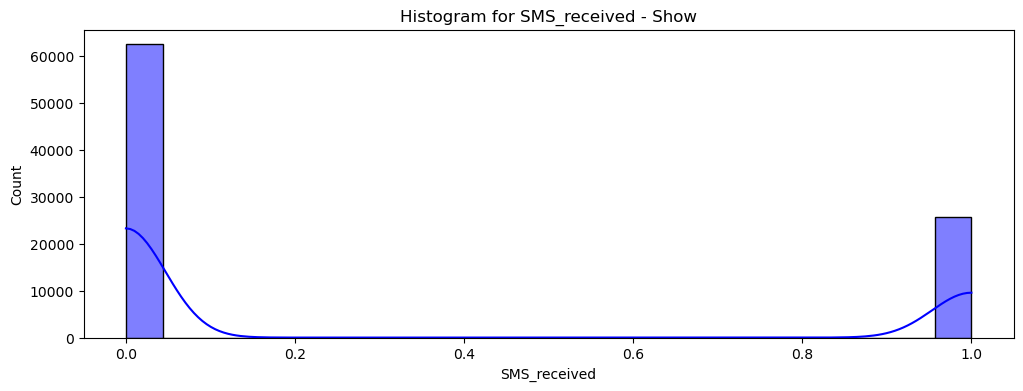

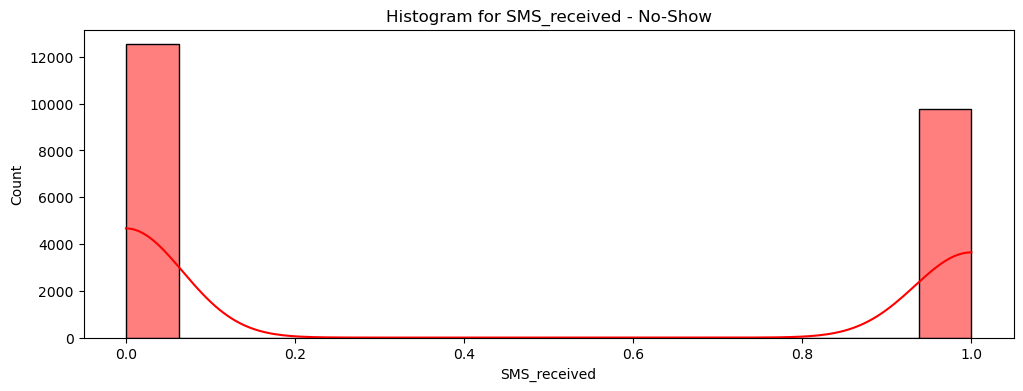

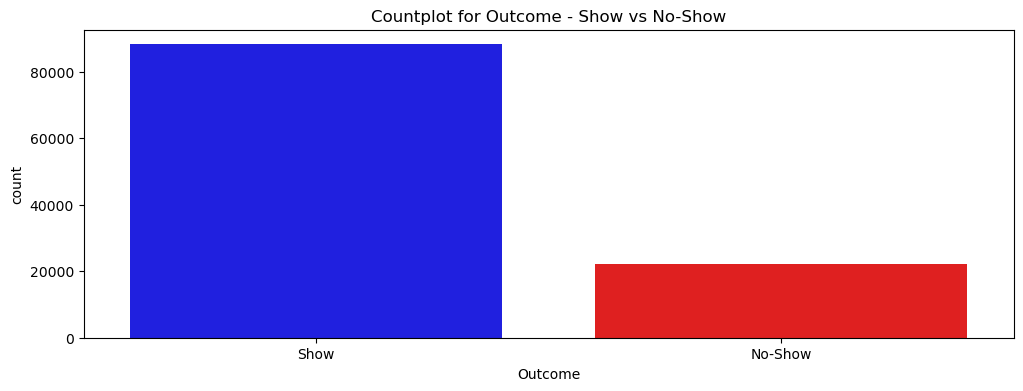

In [14]:
# Plots
for column in plot_df.columns:
    # Check if the column is numeric (int or float)
    if pd.api.types.is_numeric_dtype(plot_df[column]):
        # Create separate histograms for 'Show' and 'No-Show'
        for outcome_value in plot_df['Outcome'].unique():
            plt.figure(figsize=(12, 4))
            subset_data = plot_df[plot_df['Outcome'] == outcome_value]
            color = 'blue' if outcome_value == 'Show' else 'red'
            sns.histplot(data=subset_data, x=column, kde=True, color=color)
            plt.title(f'Histogram for {column} - {outcome_value}')
            plt.show()
    else:
        # Handle categorical variables with countplot
        plt.figure(figsize=(12, 4))
        sns.countplot(data=plot_df, x=column, hue="Outcome", palette={'Show': 'blue', 'No-Show': 'red'})
        plt.title(f'Countplot for {column} - Show vs No-Show')
        plt.show()